In [3]:
import numpy as np
import pandas as pd
import re,string  #regular expression or RegEx in python
import matplotlib.pyplot as plt
from nltk.corpus import stopwords  #Natural Language ToolKit
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SU3ARNA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df = pd.read_csv('bbc-text.csv', encoding = 'latin1')
df = df.sample(frac = 1)
df

,category,text
28,politics,terror suspects face house arrest uk citizens ...
1903,entertainment,beastie boys win sampling battle us rappers be...
1030,politics,blair defends terror law changes the prime min...
152,politics,lib dems demand new inquiry a judge should loo...
382,business,argentina venezuela in oil deal argentina and...
...,...,...
1274,business,nasdaq planning $100m share sale the owner of ...
903,tech,telewest to challenge sky plus cable firm tele...
603,entertainment,sir paul rocks super bowl crowds sir paul mcca...
1803,entertainment,super size me wins writers award super size m...


In [5]:
pd.set_option('display.max.rows', 2225)

In [6]:
df

,category,text
28,politics,terror suspects face house arrest uk citizens ...
1903,entertainment,beastie boys win sampling battle us rappers be...
1030,politics,blair defends terror law changes the prime min...
152,politics,lib dems demand new inquiry a judge should loo...
382,business,argentina venezuela in oil deal argentina and...
2131,business,millions go missing at china bank two senior o...
412,politics,blair labour s longest-serving pm tony blair h...
137,tech,2d metal slug offers retro fun like some drill...
53,business,pernod takeover talk lifts domecq shares in uk...
606,tech,court mulls file-sharing future judges at the ...


In [7]:
#No of a categories
len(set(df['category']))

5

In [8]:
df.groupby('category').category.count()

category
business         510
entertainment    386
politics         417
sport            511
tech             401
Name: category, dtype: int64

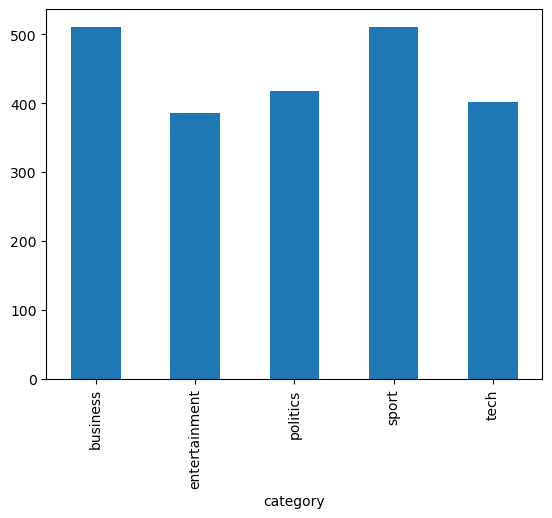

In [9]:
#Analyzing data
df.groupby('category').category.count().plot.bar()
plt.show()

In [10]:
#stop words
nltk.download('stopwords')
words = stopwords.words("english")
print(words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SU3ARNA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
# Data Cleaning using regex
regs = re.sub("[^a-zA-Z]", " ", df['text'][0]).lower()
regs

'tv future in the hands of viewers with home theatre systems  plasma high definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time   that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes  with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices   one of the most talked about technologies of ces has been digital and personal video recorders  dvr and pvr   these set top boxes  like the us s tivo and the uk s sky  system  allow people to record  store  play  pause and forward wind tv programmes when they want   essentially  the technology allows for much more personalised tv  they are also being built in to high

In [12]:
# Data Cleaning using stemmer

stemmer = PorterStemmer()
data = "I am loving computing".split()
print(data)
" ".join([stemmer.stem(i) for i in data])
# stemmer.stem("")

['I', 'am', 'loving', 'computing']


'i am love comput'

In [13]:
# Data Cleaning removing stopwords
words = stopwords.words("english")
without_stop_words_of_a_news = " ".join([i for i in regs.lower().split() if i not in words])
without_stop_words_of_a_news

'tv future hands viewers home theatre systems plasma high definition tvs digital video recorders moving living room way people watch tv radically different five years time according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes us leading trend programmes content delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices one talked technologies ces digital personal video recorders dvr pvr set top boxes like us tivo uk sky system allow people record store play pause forward wind tv programmes want essentially technology allows much personalised tv also built high definition tv sets big business japan us slower take europe lack high definition programming people forward wind adverts also forget abiding network channel schedules putting together la carte entertainment us networks cable satellite companies worried means terms advertising revenues we

In [14]:
#a = "Hello_world!"
#regs = re.sub("[^a-zA-Z]"," ",a)
#regs

In [15]:
# Data Cleaning using stemmer

stemmer = PorterStemmer()
data = df['text'][0].split()
print(data)
" ".join([stemmer.stem(i) for i in data])
# stemmer.stem("")

['tv', 'future', 'in', 'the', 'hands', 'of', 'viewers', 'with', 'home', 'theatre', 'systems', 'plasma', 'high-definition', 'tvs', 'and', 'digital', 'video', 'recorders', 'moving', 'into', 'the', 'living', 'room', 'the', 'way', 'people', 'watch', 'tv', 'will', 'be', 'radically', 'different', 'in', 'five', 'years', 'time.', 'that', 'is', 'according', 'to', 'an', 'expert', 'panel', 'which', 'gathered', 'at', 'the', 'annual', 'consumer', 'electronics', 'show', 'in', 'las', 'vegas', 'to', 'discuss', 'how', 'these', 'new', 'technologies', 'will', 'impact', 'one', 'of', 'our', 'favourite', 'pastimes.', 'with', 'the', 'us', 'leading', 'the', 'trend', 'programmes', 'and', 'other', 'content', 'will', 'be', 'delivered', 'to', 'viewers', 'via', 'home', 'networks', 'through', 'cable', 'satellite', 'telecoms', 'companies', 'and', 'broadband', 'service', 'providers', 'to', 'front', 'rooms', 'and', 'portable', 'devices.', 'one', 'of', 'the', 'most', 'talked-about', 'technologies', 'of', 'ces', 'has', 

'tv futur in the hand of viewer with home theatr system plasma high-definit tv and digit video record move into the live room the way peopl watch tv will be radic differ in five year time. that is accord to an expert panel which gather at the annual consum electron show in la vega to discuss how these new technolog will impact one of our favourit pastimes. with the us lead the trend programm and other content will be deliv to viewer via home network through cabl satellit telecom compani and broadband servic provid to front room and portabl devices. one of the most talked-about technolog of ce ha been digit and person video record (dvr and pvr). these set-top box like the us s tivo and the uk s sky+ system allow peopl to record store play paus and forward wind tv programm when they want. essenti the technolog allow for much more personalis tv. they are also be built-in to high-definit tv set which are big busi in japan and the us but slower to take off in europ becaus of the lack of hig

In [16]:
# Data Cleaning removing stopwords
words = stopwords.words("english")
without_stop_words_of_a_news = " ".join([i for i in regs.lower().split() if i not in words])
without_stop_words_of_a_news

'tv future hands viewers home theatre systems plasma high definition tvs digital video recorders moving living room way people watch tv radically different five years time according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes us leading trend programmes content delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices one talked technologies ces digital personal video recorders dvr pvr set top boxes like us tivo uk sky system allow people record store play pause forward wind tv programmes want essentially technology allows much personalised tv also built high definition tv sets big business japan us slower take europe lack high definition programming people forward wind adverts also forget abiding network channel schedules putting together la carte entertainment us networks cable satellite companies worried means terms advertising revenues we

In [17]:
# Doing all cleaning process using regex, stemmer, stopwords for all data
df['cleaned'] = list(filter(lambda x: [i for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words],df['text']))
df['cleaned'] = df['cleaned'].apply(lambda x: " ".join([stemmer.stem(i) for i in x.lower().split()]))
df

,category,text,cleaned
28,politics,terror suspects face house arrest uk citizens ...,terror suspect face hous arrest uk citizen sus...
1903,entertainment,beastie boys win sampling battle us rappers be...,beasti boy win sampl battl us rapper beasti bo...
1030,politics,blair defends terror law changes the prime min...,blair defend terror law chang the prime minist...
152,politics,lib dems demand new inquiry a judge should loo...,lib dem demand new inquiri a judg should look ...
382,business,argentina venezuela in oil deal argentina and...,argentina venezuela in oil deal argentina and ...
2131,business,millions go missing at china bank two senior o...,million go miss at china bank two senior offic...
412,politics,blair labour s longest-serving pm tony blair h...,blair labour s longest-serv pm toni blair ha b...
137,tech,2d metal slug offers retro fun like some drill...,2d metal slug offer retro fun like some drill ...
53,business,pernod takeover talk lifts domecq shares in uk...,pernod takeov talk lift domecq share in uk dri...
606,tech,court mulls file-sharing future judges at the ...,court mull file-shar futur judg at the us supr...


In [18]:
df.to_csv('cleaned_news.csv')

In [19]:
# Training model
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()

vectorizer = TfidfVectorizer()
X = df['cleaned']
Y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15) #Splitting dataset

# #Creating Pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=2000)),
                     ('clf', LogisticRegression(random_state=1))])

# from sklearn.pipeline import Pipeline
# from sklearn.svm import SVC
# pipeline = Pipeline([
#     ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
#     ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
#     ('classifier', SVC()),  # train on TF-IDF vectors w/ SVM
# ])


# #Training model
model = pipeline.fit(X_train, y_train)

# #Creating pickle file
# with open('LogisticRegression.pickle', 'wb') as f:
#     pickle.dump(model, f)

In [20]:
print(X_test,y_test)

1652    duran duran show set for us tv chart star dura...
1301    short attack us over tsunami aid former cabine...
388     dollar hit new low versu euro the us dollar ha...
535     pc ownership to doubl by 2010 the number of pe...
1984    llewellyn plan wale retir wale record cap hold...
391     industri reviv hope for japan japanes industri...
1381    million to miss out on the net by 2025 40% of ...
661     vibe award back despit violenc the us vibe awa...
784     &#163;1.8m indec fine for viacom media giant v...
1401    brazil play down varig rescu the brazilian gov...
678     oscar host rock to keep it clean oscar host ch...
846     slovakia seal hopman cup success slovakia clin...
83      news corp make $5.4bn fox offer news corpor is...
190     kinnock to urg reform in lord neil kinnock ha ...
212     chepkemei join edinburgh line-up susan chepkem...
300     star pay tribut to actor davi hollywood star i...
543     economi strong in elect year uk busi are set t...
1277    barkle

In [21]:
#Accuracy
from sklearn.metrics import accuracy_score
predict_news_cat = model.predict(X_test)
print(accuracy_score(y_test,predict_news_cat))
print('\n')
print(predict_news_cat)

0.9730538922155688


['entertainment' 'politics' 'business' 'business' 'sport' 'business'
 'tech' 'entertainment' 'entertainment' 'business' 'entertainment' 'sport'
 'business' 'politics' 'sport' 'entertainment' 'business' 'sport'
 'politics' 'politics' 'business' 'sport' 'entertainment' 'tech'
 'politics' 'politics' 'entertainment' 'politics' 'sport' 'politics'
 'sport' 'business' 'business' 'sport' 'politics' 'tech' 'sport'
 'business' 'entertainment' 'business' 'business' 'tech' 'sport'
 'entertainment' 'politics' 'sport' 'business' 'politics' 'business'
 'entertainment' 'sport' 'business' 'sport' 'sport' 'tech' 'sport'
 'business' 'sport' 'entertainment' 'sport' 'sport' 'tech' 'entertainment'
 'business' 'tech' 'business' 'sport' 'politics' 'business' 'tech' 'sport'
 'business' 'sport' 'politics' 'tech' 'politics' 'entertainment' 'tech'
 'tech' 'tech' 'politics' 'entertainment' 'entertainment' 'sport'
 'business' 'politics' 'politics' 'sport' 'business' 'politics' 'tech'
 'entertai

In [23]:
# file = open('/content/news.txt','r')
# news = file.read()
# file.close()

news = input("Enter news = ")
news_data = {'predict_news':[news]}
news_data_df = pd.DataFrame(news_data)

predict_news_cat = model.predict(news_data_df['predict_news'])
print("Predicted news category = ",predict_news_cat[0])

Enter news = Good Neighbors International (GNI) Nepal celebrated its 20th anniversary amid an event organized in Kathmandu on March 28.  Speaking at the event, Country Director of GNI Nepal Jaekyun Rho said that the organization has been working in areas such as child protection, education, health, income generation, drinking water, sanitation and hygiene, disaster risk reduction, climate change adaptation, and advocacy, and conducting programs targeting children from marginalized, crisis-prone communities and poor families in 22 districts to improve the quality of life of the children, their families and communities. He also thanked everyone involved for their cooperation and support.
Predicted news category =  business


               precision    recall  f1-score   support

     business       0.97      0.96      0.97        75
entertainment       0.98      0.98      0.98        46
     politics       0.98      0.97      0.97        59
        sport       0.99      0.99      0.99        80
         tech       0.95      0.97      0.96        74

     accuracy                           0.97       334
    macro avg       0.97      0.97      0.97       334
 weighted avg       0.97      0.97      0.97       334

[[72  0  0  0  3]
 [ 0 45  1  0  0]
 [ 0  0 57  1  1]
 [ 1  0  0 79  0]
 [ 1  1  0  0 72]]


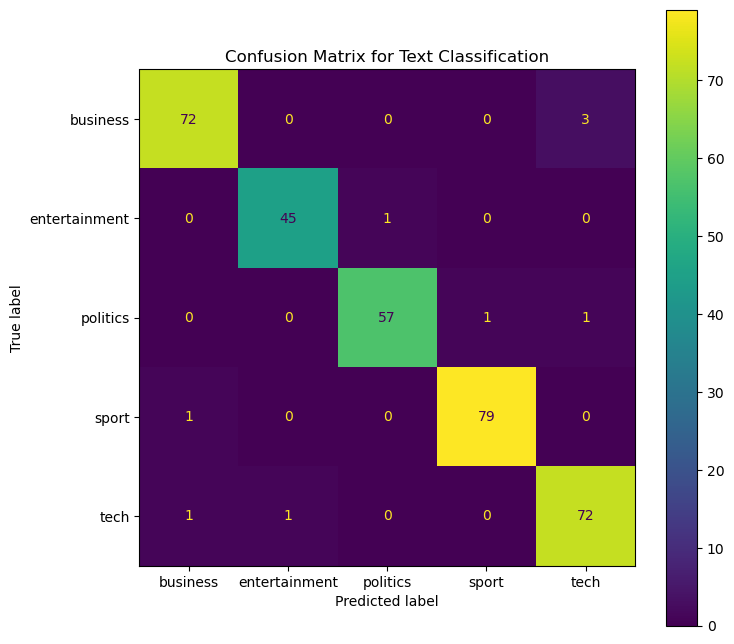

In [24]:
# confusion matrix and classification report(precision, recall, F1-score)
ytest = np.array(y_test)
print(classification_report(ytest,model.predict(X_test)))
print(confusion_matrix(ytest,model.predict(X_test)))


import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(ytest,model.predict(X_test))
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
class_names = ['business','entertainment','politics','sport','tech']
# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for Text Classification')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);